In [21]:
# 03 - Reports
# In this notebook, we will generate reports and visualizations based on the analysis of newspaper articles.
# We'll focus on summarizing key insights and presenting them in a clear and informative manner.

# Step 1: Load the Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("C:/Users/dvdda/OneDrive/Escritorio/FastApiProjects/pythonProject2")
print("Updated Working Directory:", os.getcwd())

# Define file path
file_path = 'data/raw/mv_newspapers_articles_202410120953.csv'  

# Check if file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' does not exist. Please check the path and try again.")
else:
    # Load the dataset
    data = pd.read_csv(file_path)

    # Display the first few rows
    # Convert 'publicate_date' to datetime format
data['publicate_date'] = pd.to_datetime(data['publicate_date'])

# Filter data for the specific date
specific_date = '2024-03-01'
filtered_data = data[data['publicate_date'] == specific_date]

# Reorder columns to place 'amount' before 'id_country'
columns_order = ['tn_id_type_newspaper', 'type_name', 'amount', 'publicate_date' ,'id_country', 'country_name']
filtered_data = filtered_data[columns_order]

# Display the filtered data
display(filtered_data.head())

Updated Working Directory: C:\Users\dvdda\OneDrive\Escritorio\FastApiProjects\pythonProject2


,tn_id_type_newspaper,type_name,amount,publicate_date,id_country,country_name
0,1,El Tiempo,116,2024-03-01,1,Colombia
225,2,El Espectador,66,2024-03-01,1,Colombia
450,3,Semana,55,2024-03-01,1,Colombia
675,4,El Comercio,99,2024-03-01,2,Ecuador
900,5,El Universo,108,2024-03-01,2,Ecuador


In [15]:
# Step 2: Generate Report for Last Week's Publications
from datetime import timedelta

# Filter data for the last 7 days
last_day = data['publicate_date'].max()
first_day = last_day - timedelta(days=7)
last_week = data[(data['publicate_date'] >= first_day) & (data['publicate_date'] <= last_day)]

# Group by day and calculate the total number of articles
last_week_summary = last_week.groupby('publicate_date')['amount'].sum()
print("Last Week's Publication Totals by Day:")
print(last_week_summary)

Last Week's Publication Totals by Day:
publicate_date
2024-10-04    948
2024-10-05    956
2024-10-06    988
2024-10-07    980
2024-10-08    965
2024-10-09    928
2024-10-10    943
2024-10-11    937
Name: amount, dtype: int64


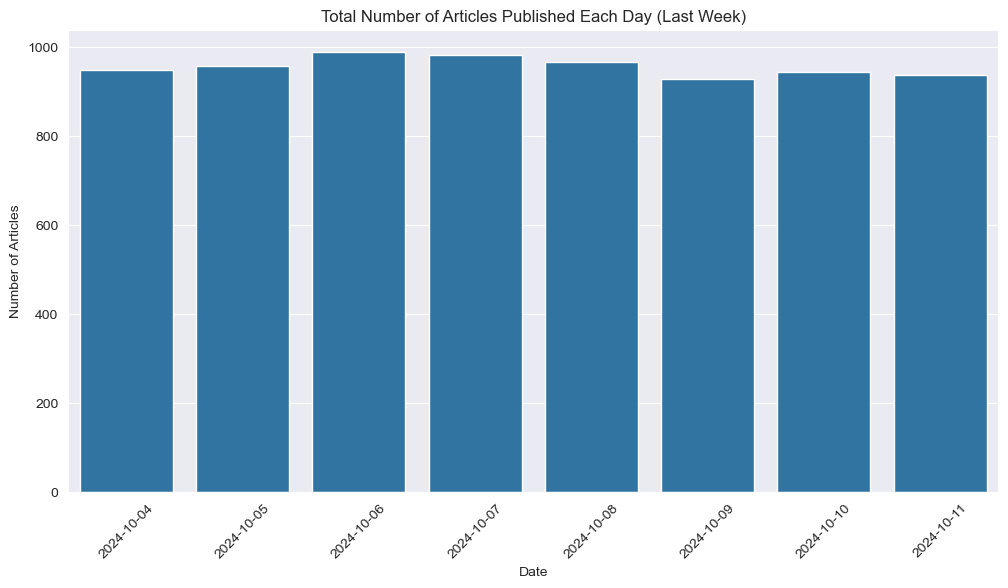

In [16]:
# Plot the total number of articles per day for the last week
plt.figure(figsize=(12, 6))
sns.barplot(x=last_week_summary.index, y=last_week_summary.values)
plt.title('Total Number of Articles Published Each Day (Last Week)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Gráfica de barras: Total de Artículos Publicados Cada Día en la Última Semana

# Este gráfico de barras muestra la cantidad total de artículos publicados por día en los últimos 7 días.

# Componentes del gráfico:
# - Eje X (Date): Representa las fechas específicas dentro del período de la última semana.
#   - Cada barra está etiquetada con una fecha, que representa un día individual entre el 2024-10-04 y el 2024-10-11.
#   - Las etiquetas de fecha están rotadas 45 grados para mejorar la legibilidad.
# 
# - Eje Y (Number of Articles): Muestra el número total de artículos publicados en cada fecha.
#   - La escala del eje Y va de 0 a 1000 artículos, lo que facilita la comparación de las cantidades diarias.
#
# - Barras:
#   - Cada barra representa el total de artículos publicados en la fecha indicada en el eje X.
#   - Las barras son uniformes en altura, lo que indica que la cantidad de artículos publicados cada día es bastante similar durante la última semana.
#   - La altura de la barra proporciona una indicación visual de la cantidad relativa de artículos publicados en cada día.
#
# - Título del Gráfico (Total Number of Articles Published Each Day (Last Week)):
#   - Describe el contenido del gráfico y aclara que los datos reflejan el total de publicaciones diarias durante el último período de 7 días.
#
# Interpretación:
# - Este gráfico es útil para identificar patrones de publicación en la última semana.
# - La similitud en la altura de las barras sugiere que no hubo variaciones significativas en el número de publicaciones diarias en este período.


In [17]:
# Step 3: Compare Last Week's Publications with Daily Averages

# Calculate average number of articles published by day of the week for overall data
daily_avg = data.groupby(data['publicate_date'].dt.day_name())['amount'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
print("Average Articles Published by Day of the Week:")
print(daily_avg)

# Add day of the week column to last_week for consistent comparison
last_week = last_week.copy()  # Make a copy to avoid SettingWithCopyWarning
last_week['day_of_week'] = last_week['publicate_date'].dt.day_name()

# Aggregate the last week's data by day of the week
last_week_avg = last_week.groupby('day_of_week')['amount'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

Average Articles Published by Day of the Week:
publicate_date
Monday       80.440104
Tuesday      80.390625
Wednesday    79.859375
Thursday     80.039062
Friday       79.848485
Saturday     79.721354
Sunday       79.768229
Name: amount, dtype: float64


In [ ]:
# Este código compara la cantidad promedio de artículos publicados por día de la semana entre los datos generales y la última semana.

# Paso 1: Calcular el Promedio Diario General
# - Calcula el número promedio de artículos publicados para cada día de la semana utilizando todos los datos disponibles.
# - Ordena los días de la semana de lunes a domingo para una interpretación más clara.
# 
# Paso 2: Preparar los Datos de la Última Semana
# - Se crea una copia de los datos de la última semana para evitar advertencias de modificación.
# - Luego, se añade una columna que representa el día de la semana basado en la fecha de publicación de cada artículo.
# 
# Paso 3: Calcular el Promedio Diario para la Última Semana
# - Agrupa los datos de la última semana por el día de la semana y calcula el número promedio de artículos publicados.
# - Ordena los días de la semana de lunes a domingo para mantener consistencia con el promedio general.
# 
# Interpretación:
# - La salida muestra el promedio de artículos publicados para cada día de la semana (de lunes a domingo) usando todos los datos.
# - Observamos que el promedio de publicaciones por día es aproximadamente 80 artículos, con pequeñas variaciones entre los días.
# - Esta comparación permite identificar si el patrón de publicación en la última semana difiere del comportamiento promedio, 
#   lo cual podría señalar cambios en la actividad de publicación reciente en comparación con la tendencia general.


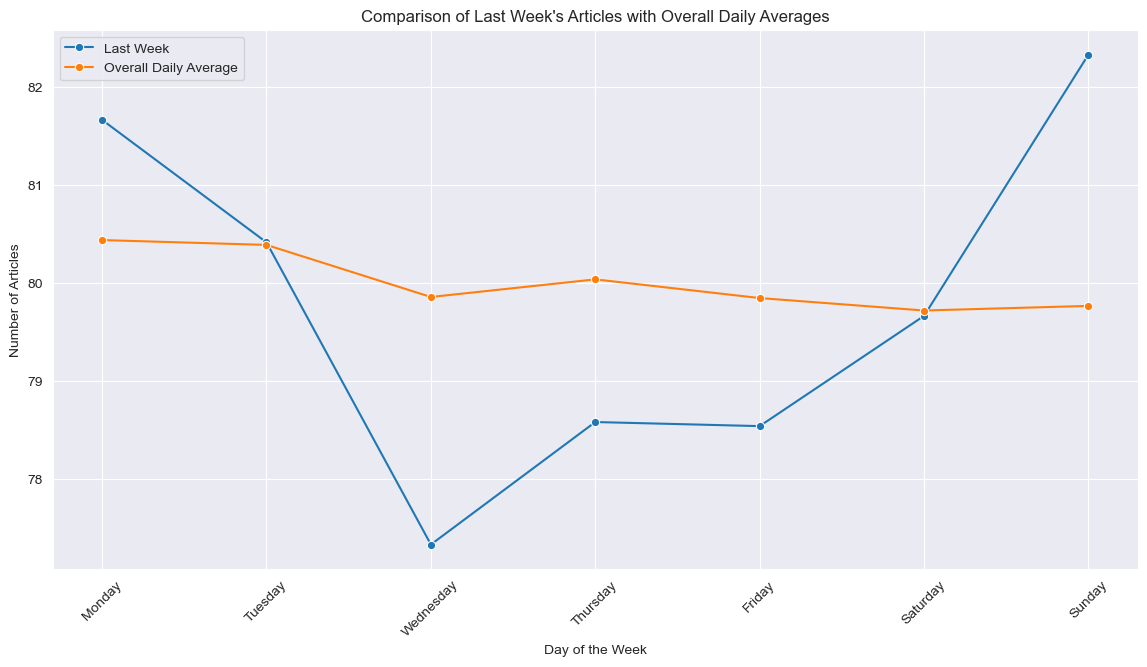

In [18]:
# Plot comparison
plt.figure(figsize=(14, 7))
# Plot last week's daily average
sns.lineplot(x=last_week_avg.index, y=last_week_avg.values, label='Last Week', marker="o")
# Plot the overall daily average
sns.lineplot(x=daily_avg.index, y=daily_avg.values, label='Overall Daily Average', marker="o")
plt.title('Comparison of Last Week\'s Articles with Overall Daily Averages')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# Esta gráfica de líneas compara el número promedio de artículos publicados entre la última semana y el promedio general diario para cada día de la semana.

# Componentes de la gráfica:
# - Eje X: Representa los días de la semana, desde lunes hasta domingo. Cada punto en este eje corresponde a un día específico de la semana.
# - Eje Y: Representa el número de artículos publicados. Este eje muestra la cantidad promedio de artículos para cada día de la semana.
# - Línea azul ("Last Week"): Muestra el número promedio de artículos publicados por día durante la última semana.
# - Línea naranja ("Overall Daily Average"): Muestra el número promedio de artículos publicados para cada día de la semana usando todos los datos disponibles, proporcionando una referencia de la tendencia general.
# - Título: "Comparison of Last Week's Articles with Overall Daily Averages" explica el propósito de la gráfica, que es comparar la actividad de publicación reciente con la tendencia general.

# Interpretación:
# - Las líneas muestran las variaciones entre los valores diarios de la última semana en comparación con el promedio general.
# - Si la línea azul se desvía significativamente de la línea naranja, sugiere que la última semana tiene patrones de publicación diferentes a los del promedio histórico.
# - Esta comparación ayuda a identificar días específicos en los que el número de artículos se ha desviado del patrón esperado.


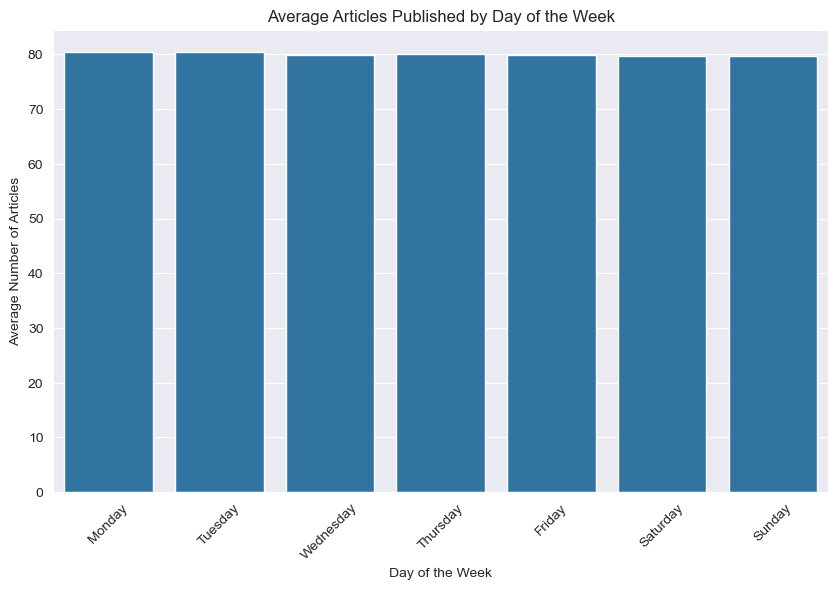

In [19]:
# Step 4: Additional Visualizations for Insights
# Calculate the average number of articles by day of the week across all data
data['day_of_week'] = data['publicate_date'].dt.day_name()
avg_articles_by_day = data.groupby('day_of_week')['amount'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the average number of articles by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_articles_by_day.index, y=avg_articles_by_day.values)
plt.title('Average Articles Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Este gráfico de barras muestra el promedio de artículos publicados por día de la semana.

# Componentes de la gráfica:
# - Eje X: Representa los días de la semana, de lunes a domingo. Cada barra corresponde a un día específico.
# - Eje Y: Representa el número promedio de artículos publicados, escalado en una cuantía de 0 a 80.
# - Barras: Cada barra indica el número promedio de artículos publicados en cada día de la semana, basándose en datos históricos.
# - Título: "Average Articles Published by Day of the Week" describe el propósito de la gráfica, que es visualizar la cantidad promedio de publicaciones por día.

# Interpretación:
# - Las barras tienen una altura muy similar, lo que sugiere una distribución relativamente uniforme del promedio de artículos publicados cada día de la semana.
# - Esto implica que no hay un día específico en el que se publiquen significativamente más o menos artículos; el volumen de publicaciones es consistente a lo largo de la semana.


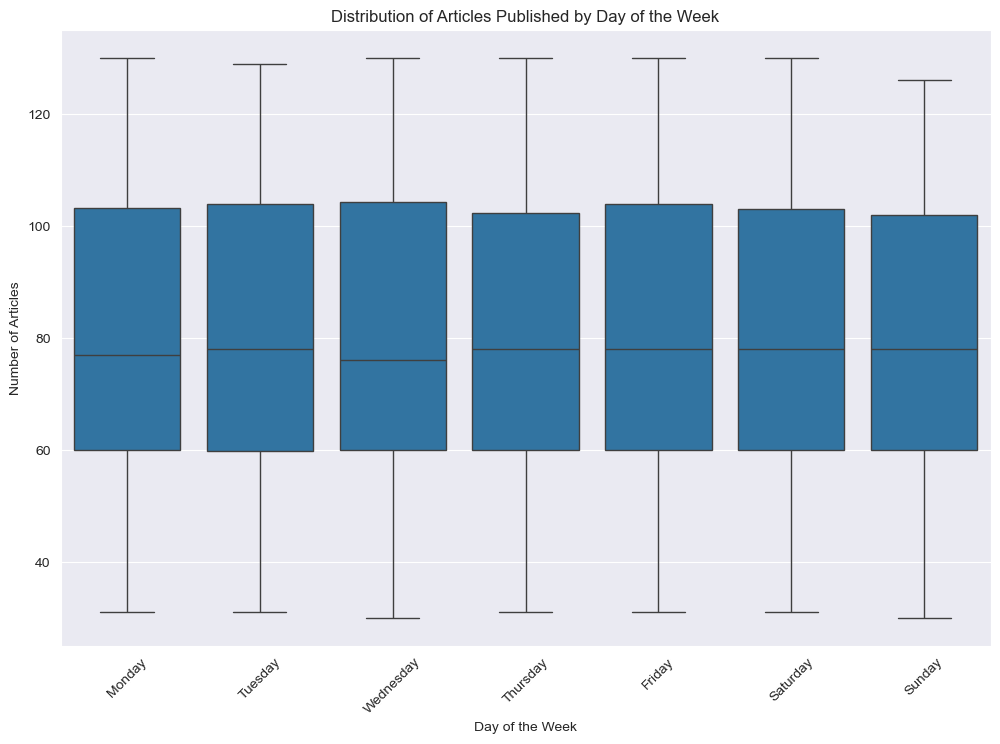

In [20]:
# Boxplot for distribution of articles published each day of the week
plt.figure(figsize=(12, 8))
sns.boxplot(x='day_of_week', y='amount', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Articles Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Análisis del Boxplot de Artículos Publicados por Día de la Semana

# Componentes del Boxplot:
# - La **caja** representa el rango intercuartil (IQR), que incluye el 50% central de los datos.
#   - La parte inferior de la caja es el **primer cuartil (Q1)**, que representa el percentil 25.
#   - La parte superior de la caja es el **tercer cuartil (Q3)**, que representa el percentil 75.
#   - La línea dentro de la caja es la **mediana (Q2)**, indicando el percentil 50 de los datos.
# - Los **bigotes** se extienden desde la caja para mostrar el rango de valores que están dentro de 1.5 veces el IQR desde Q1 y Q3.
#   - El bigote inferior muestra el valor mínimo dentro de este rango.
#   - El bigote superior muestra el valor máximo dentro de este rango.
# - Los **outliers** son puntos que están más allá de los bigotes, representando días con un número inusualmente alto o bajo de artículos.
#   - Estos puntos indican días de publicación excepcionales que se desvían significativamente del patrón general.

# Interpretación:
# - El boxplot ilustra la variabilidad en el número de artículos publicados en cada día de la semana.
# - Para los días con una caja estrecha, el conteo de artículos es consistente alrededor de la mediana, indicando números de publicación estables.
# - Cajas más anchas indican mayor variabilidad en la cantidad de artículos publicados.
# - La presencia de outliers sugiere que algunos días experimentaron un número inusualmente alto o bajo de publicaciones, posiblemente debido a eventos especiales o a un calendario de publicación irregular.
# - Los bigotes muestran el rango de conteos típicos de artículos diarios, mientras que los outliers resaltan días con valores extremos, lo que puede ser relevante para investigaciones adicionales.

# En resumen, este boxplot proporciona una visión general tanto de los números típicos de publicaciones diarias de artículos 
# como de cualquier variación inusual en esos números para cada día de la semana.